In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
df_trec = pd.read_parquet("../../../data/metadata_TREC.parquet")
df_ceur = pd.read_parquet("../../../data/metadata_CEUR.parquet")
df_lncs = pd.read_parquet("../../../data/metadata_LNCS.parquet")
df_lncs.loc[df_lncs['ID'] == "lncs_649", 'Section'] = "CLEF at SemEval 2007"

## Assign corresponding Labs to the documents of LNCS

In [3]:
with open('../../../data/LNCS_abbreviations_headings.json', 'r', encoding="utf-8") as file:
    LNCS_lab_abbreviations = json.load(file)

def find_key(section):
    for key, values in LNCS_lab_abbreviations.items():
        if section in values:
            return key
    return None

# Apply concordance dict to unify the corresponding Lab names
df_lncs['Labs'] = df_lncs['Section'].apply(find_key)

## Assign corresponding Labs to the documents of CEUR

In [4]:
with open('../../../data/abbreviations_CLEF_CEUR.json', 'r', encoding="utf-8") as file:
    matching_labs = json.load(file)

labs = []
for i,j in df_ceur.iterrows():
    assign_labs = []
    for k in matching_labs:
        for l in matching_labs[k]:
            if l in j["Section"]:
                assign_labs.append(k)
    labs.append(list(set(assign_labs)))
    
# Apply concordance dict to unify the corresponding Lab names
df_ceur["Labs"] = labs

## Assign corresponding Tracks to the document of TREC

In [5]:
track_assignments = pd.read_parquet("../../../data/Assign_tracks_by_ID_for_TREC.parquet")

In [6]:
df_trec = pd.merge(df_trec, track_assignments, how = "left", left_on="ID", right_on="ID")

In [7]:
df_trec

,PubYear,url,Authors,Title,Section,filename,filepath,ID,Tracks
0,2000,http://trec.nist.gov/pubs/trec9/papers/overvie...,"[Ellen M. Voorhees, Donna Harman]",Overview of the Ninth Text REtrieval Conferenc...,Uncategorized,overview_9.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1,[Overview]
1,2000,http://trec.nist.gov/pubs/trec9/papers/trec9-c...,"[Fredric C. Gey, Aitao Chen]",TREC-9 Cross-Language Information Retrieval (E...,Uncategorized,trec9-clir-overview.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_2,[Cross-Language]
2,2000,http://trec.nist.gov/pubs/trec9/papers/filteri...,"[Stephen E. Robertson, David A. Hull]",The TREC-9 Filtering Track Final Report.,Uncategorized,filtering_new.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_3,[Filtering]
3,2000,http://trec.nist.gov/pubs/trec9/papers/t9irep.pdf,"[William R. Hersh, Paul Over]",The TREC-9 Interactive Track Report.,Uncategorized,t9irep.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_4,[Interactive]
4,2000,http://trec.nist.gov/pubs/trec9/papers/liggett...,"[Walter Liggett, Chris Buckley]",Query Expansion Seen Through Return Order of R...,Uncategorized,liggett.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_5,[Evaluation]
...,...,...,...,...,...,...,...,...,...
1967,2019,https://trec.nist.gov/pubs/trec28/papers/OVERV...,"[Laura Dietz, John Foley]",TREC CAR Y3: Complex Answer Retrieval Overview,Overview,OVERVIEW.CAR.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1968,[Complex Answer Retrieval]
1968,2007,https://trec.nist.gov/pubs/trec16/papers/umelb...,"[William Webber, Vo Ngoc Anh, Alistair Moffat]",The University of Melbourne in the Million Que...,Participant,umelbourne.ngoc-ahn.MQ.final.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1969,[Million Query]
1969,2020,https://trec.nist.gov/pubs/trec29/papers/OVERV...,"[Asia J. Biega, Fernando Diaz, Michael D. Ekst...",Overview of the TREC 2020 Fair Ranking Track∗,Overview,OVERVIEW.FR.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1970,[Fair Ranking]
1970,2017,https://trec.nist.gov/pubs/trec26/papers/NOVAS...,"[Gonçalo Araújo, André Mourão, João Magalhães]",NOVASearch at Precision Medicine 2017,Participant,NOVASearch-PM.pdf,D:/Studium/Masterarbeit/PythonProject/data/PDF...,trec_1971,[Precision Medicine]


## Analysis of Medical, biological and chemical Domain


In [8]:
labs = ["BioASQ", "eHealth", "iDPP", "LifeCLEF" ,"ChEMU"]

In [9]:
tracks = ["Chemical", "Clinical Decision Support", "Clinical Trials", "Genomics", "Health Misinformation", "Medical", "Precision Medicine"]

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def filter_and_plot(df1, df2, labs_list, tracks_list, threshold=10):
    
    df1_exploded = df1.explode('Labs')
    df1_filtered = df1_exploded[df1_exploded['Labs'].isin(labs_list)]
    df1_filtered['PubYear'] = df1_filtered['PubYear'].astype(int)

    df2_exploded = df2.explode('Tracks')

    # Filter dataframe by Track names
    df2_filtered = df2_exploded[df2_exploded['Tracks'].isin(tracks_list)]
    df2_filtered['PubYear'] = df2_filtered['PubYear'].astype(int)

    # Count the amount of publications in the underlying lab per year
    lab_counts = df1_filtered.groupby(['PubYear', 'Labs']).size().unstack(fill_value=pd.NA)

    # Count the amount of publications in the underlying Track per year
    track_counts = df2_filtered.groupby(['PubYear', 'Tracks']).size().unstack(fill_value=pd.NA)

    # Unify the axis scales for both plots
    min_year = min(min(lab_counts.index), min(track_counts.index))
    max_year = max(max(lab_counts.index), max(track_counts.index))
    
    all_years = sorted(set(range(min_year, max_year + 1)))    
    
    min_y = min(lab_counts.min().min(), track_counts.min().min())
    max_y = max(lab_counts.max().max(), track_counts.max().max())

    x_ticks = list(all_years)

    lab_counts = lab_counts.dropna(how='all')  
    track_counts = track_counts.dropna(how='all')  

    # Setting threshhold if two or one subplot is created based on the amount of Labs/Tracks selected to ensure clearness
    if len(labs_list) > threshold or len(tracks_list) > threshold:
        fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True, sharey=True)
        
        if not lab_counts.empty:
            for lab in lab_counts.columns:
                axs[0].plot(lab_counts.index, lab_counts[lab], linestyle='--', marker='o', linewidth=2, label=f'Lab: {lab}')
        
        axs[0].set_title('Number of Publications per Year by Lab')
        axs[0].set_ylabel('Number of Publications')
        axs[0].set_ylim(min_y, max_y)
        axs[0].set_xticks(x_ticks)  
        axs[0].set_xticklabels(x_ticks, rotation=45)  
        axs[0].legend()
        
        if not track_counts.empty:
            for track in track_counts.columns:
                axs[1].plot(track_counts.index, track_counts[track], linestyle='-', marker='x', linewidth=2, label=f'Track: {track}')
        
        axs[1].set_title('Number of Publications per Year by Track')
        axs[1].set_xlabel('Year of Publication')
        axs[1].set_ylabel('Number of Publications')
        axs[1].set_ylim(min_y, max_y)
        axs[1].set_xticks(x_ticks)
        axs[1].set_xticklabels(x_ticks, rotation=45)  
        axs[1].legend()
        
    else:
        plt.figure(figsize=(14, 8))

        if not lab_counts.empty:
            for lab in lab_counts.columns:
                plt.plot(lab_counts.index, lab_counts[lab], linestyle='--', marker='o', linewidth=2, label=f'Lab: {lab}')
        
        if not track_counts.empty:
            for track in track_counts.columns:
                plt.plot(track_counts.index, track_counts[track], linestyle='-', marker='x', linewidth=2, label=f'Track: {track}')

        plt.title('Number of Publications per Year by Lab and Track')
        plt.xlabel('Year of Publication')
        plt.ylabel('Number of Publications')
        plt.ylim(min_y, max_y)
        plt.set_xticks(x_ticks)  
        plt.set_xticklabels(x_ticks, rotation=45) 
        plt.legend()
        
    # Format X-axis to ensure that years are displayed as integers
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

    plt.tight_layout()
    plt.show()


C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\4074329169.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['PubYear'] = df1_filtered['PubYear'].astype(int)
C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\4074329169.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['PubYear'] = df2_filtered['PubYear'].astype(int)


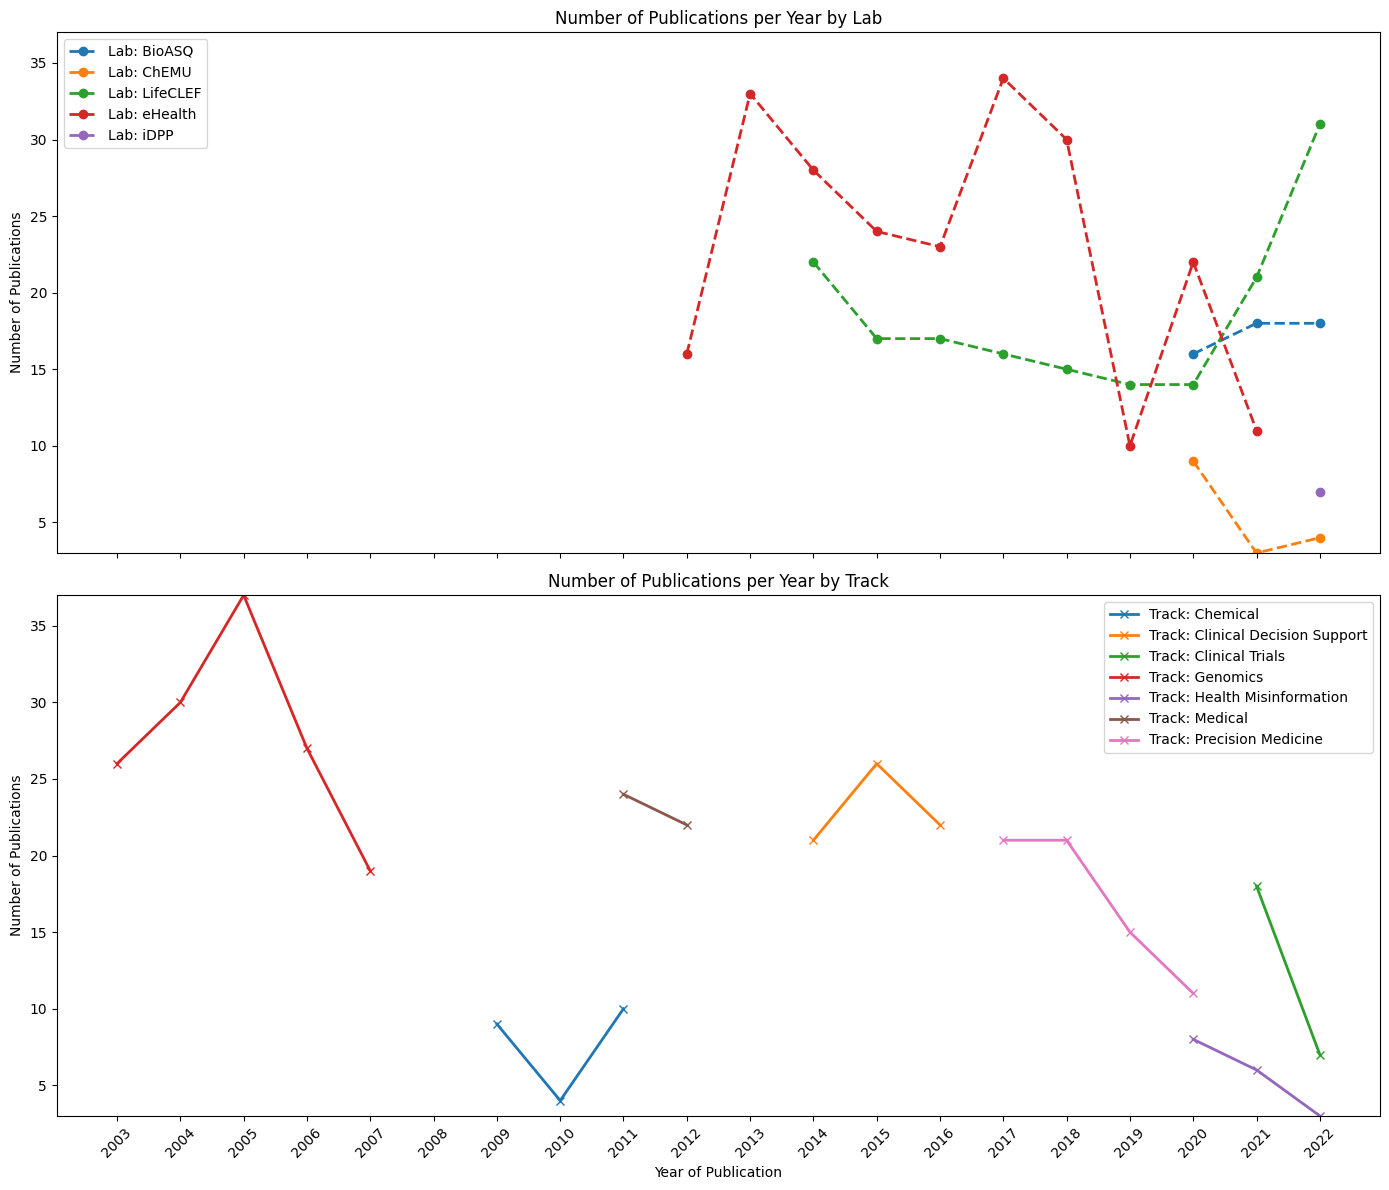

In [18]:
filter_and_plot(df_ceur, df_trec, labs, tracks, threshold=5 )

## Analysing citation numbers by track/lab


In [19]:
def add_SemanticCitations(df, path):
    with open(path, 'r', encoding="utf-8") as file:
        SemanticCitations = json.load(file)
    
    citations_semantic = []
    for i in SemanticCitations:
        try:
            citations_semantic.append([i, SemanticCitations[i]["citationCount"]])
        except:
            print(i)
    df_citations = pd.DataFrame(citations_semantic, columns=["ID", "Citations_semantic"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "ID", right_on="ID")
    return merge

In [20]:
df_lncs = add_SemanticCitations(df_lncs, "../../../data/SemanticScholar_LNCS_additional_metadata.json")
df_trec = add_SemanticCitations(df_trec, "../../../data/SemanticScholar_TREC_additional_metadata.json")
df_ceur = add_SemanticCitations(df_ceur, "../../../data/SemanticScholar_CEUR_additional_metadata.json")

In [21]:
df_ceur['PubYear'] = df_ceur['PubYear'].astype(int)
df_lncs['PubYear'] = df_lncs['PubYear'].astype(int)
df_trec['PubYear'] = df_trec['PubYear'].astype(int)

In [24]:
def filter_and_plot_avg_citations(df1, df2, labs_list, tracks_list, threshold, path_to_save, title , title_fig_1, title_fig_2):

    df1_exploded = df1.explode('Labs')
    df1_filtered = df1_exploded[df1_exploded['Labs'].isin(labs_list)]
    df1_filtered['PubYear'] = df1_filtered['PubYear'].astype(int)

    df2_exploded = df2.explode('Tracks')

    # Filter dataframe by Track names
    df2_filtered = df2_exploded[df2_exploded['Tracks'].isin(tracks_list)]
    df2_filtered['PubYear'] = df2_filtered['PubYear'].astype(int)

    # Calculate the average citation rate of publications in the underlying lab per year
    lab_avg_citations = df1_filtered.groupby(['PubYear', 'Labs'])['Citations_semantic'].mean().unstack(fill_value=pd.NA)

    # Calculate the average citation rate of publications in the underlying Track per year
    track_avg_citations = df2_filtered.groupby(['PubYear', 'Tracks'])['Citations_semantic'].mean().unstack(fill_value=pd.NA)


    
    # Unify the axis scales for both plots
    min_year = min(min(lab_avg_citations.index), min(track_avg_citations.index))
    max_year = max(max(lab_avg_citations.index), max(track_avg_citations.index))
    
    all_years = sorted(set(range(min_year, max_year + 1)))  
    x_ticks = list(all_years)

    min_y = min(lab_avg_citations.min().min(), track_avg_citations.min().min())
    max_y = max(lab_avg_citations.max().max(), track_avg_citations.max().max())
    

    lab_avg_citations = lab_avg_citations.dropna(how='all')
    track_avg_citations = track_avg_citations.dropna(how='all')

    # Setting threshhold if two or one subplot is created based on the amount of Labs/Tracks selected to ensure clearness
    if len(labs_list) > threshold or len(tracks_list) > threshold:
        fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True, sharey=True)
        
        if not lab_avg_citations.empty:
            for lab in lab_avg_citations.columns:
                axs[0].plot(lab_avg_citations.index, lab_avg_citations[lab], linestyle='--', marker='o', linewidth=2, label=f'Lab: {lab}')
        
        axs[0].set_title(title_fig_1)
        axs[0].set_ylabel('Average Citations')
        axs[0].set_ylim(min_y, max_y)
        axs[0].set_xticks(x_ticks)  
        axs[0].set_xticklabels(x_ticks, rotation=45)  
        axs[0].legend(loc='upper right')
        
        if not track_avg_citations.empty:
            for track in track_avg_citations.columns:
                axs[1].plot(track_avg_citations.index, track_avg_citations[track], linestyle='-', marker='x', linewidth=2, label=f'Track: {track}')
        
        axs[1].set_title(title_fig_2)
        axs[1].set_xlabel('Year of Publication')
        axs[1].set_ylabel('Average Citations')
        axs[1].set_ylim(min_y, max_y)
        axs[1].set_xticks(x_ticks)  
        axs[1].set_xticklabels(x_ticks, rotation=45)  
        axs[1].legend(loc='upper right')
        
    else:
        plt.figure(figsize=(14, 8))

        if not lab_avg_citations.empty:
            for lab in lab_avg_citations.columns:
                plt.plot(lab_avg_citations.index, lab_avg_citations[lab], linestyle='--', marker='o', linewidth=2, label=f'Lab: {lab}')
        
        if not track_avg_citations.empty:
            for track in track_avg_citations.columns:
                plt.plot(track_avg_citations.index, track_avg_citations[track], linestyle='-', marker='x', linewidth=2, label=f'Track: {track}')

        plt.title(title)
        plt.xlabel('Year of Publication')
        plt.ylabel('Average Citations')
        plt.ylim(min_y, max_y)
        plt.xticks(x_ticks, rotation=45)  # Setze manuelle Ticks für X-Achse
        plt.legend(loc='upper right')

    # Format X-axis to ensure that years are displayed as integers
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

    # Plot anzeigen
    plt.tight_layout()
    plt.savefig(path_to_save, dpi=300)
    plt.show()


C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['PubYear'] = df1_filtered['PubYear'].astype(int)
C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['PubYear'] = df2_filtered['PubYear'].astype(int)


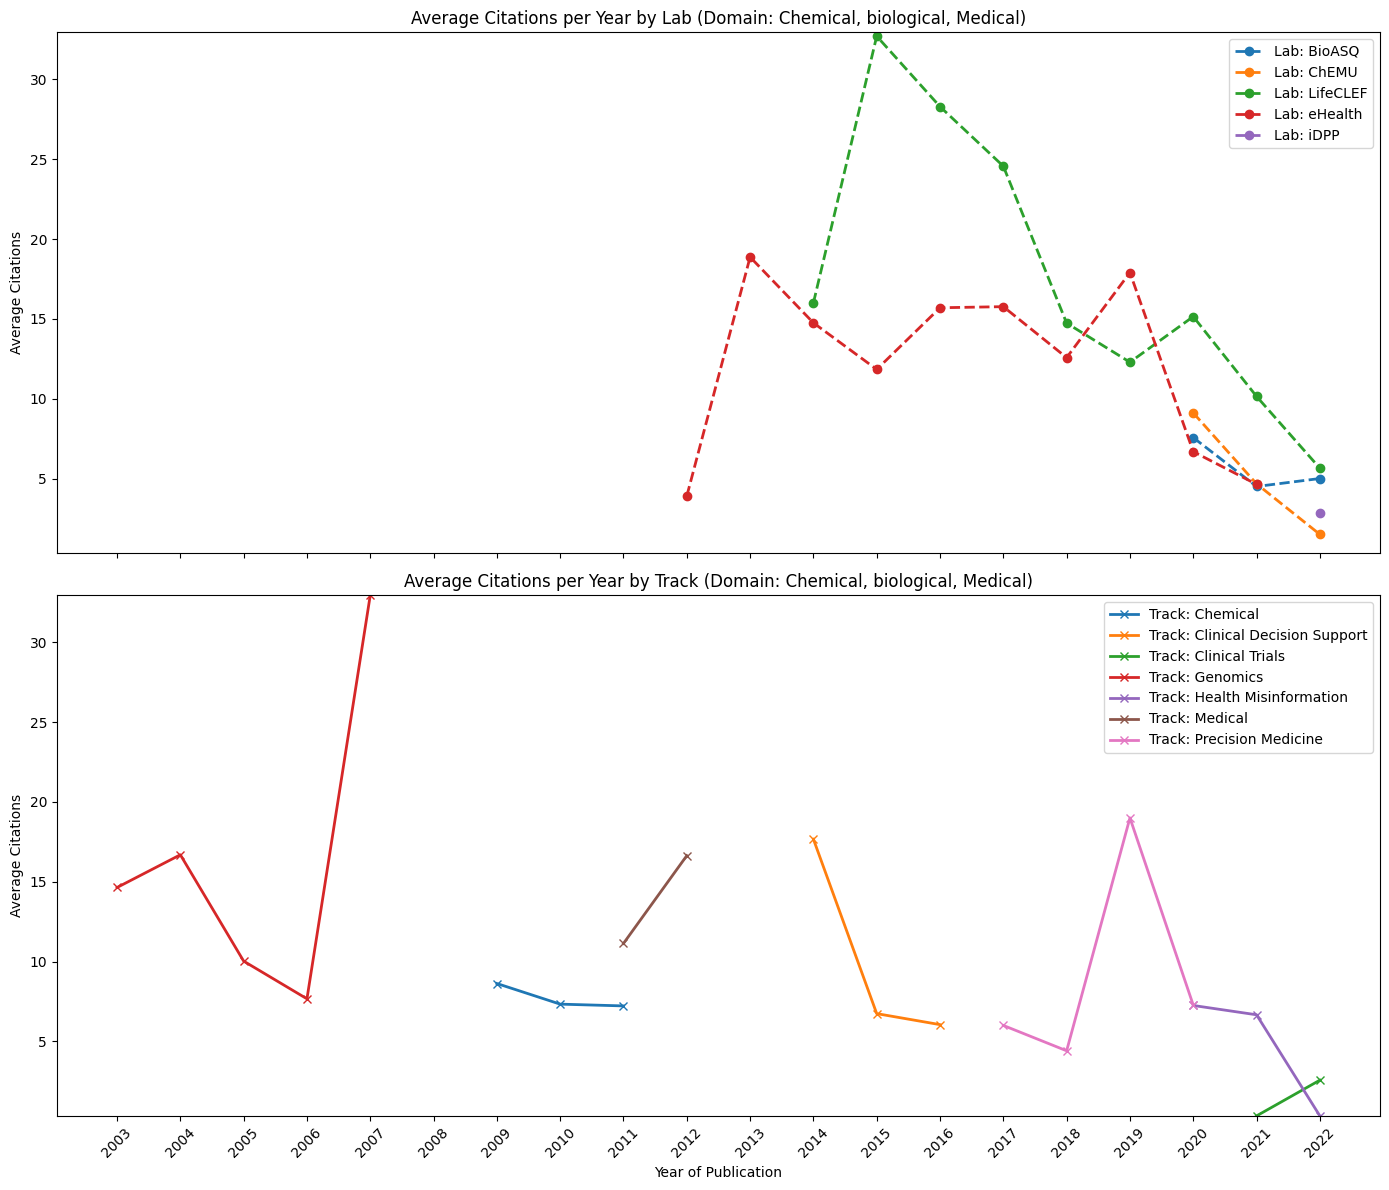

In [25]:
filter_and_plot_avg_citations(df_ceur, df_trec, labs, tracks, threshold=5, path_to_save="../../../images/biomedchem.png", title = "", title_fig_1="Average Citations per Year by Lab (Domain: Chemical, biological, Medical)", 
                             title_fig_2="Average Citations per Year by Track (Domain: Chemical, biological, Medical)")

In [26]:
labs_web = ["ProtestNews", "CheckThat!", "eRisk", "MC2", "NewsREEL", "RepLab", "CriES", "WEPS", "WebCLEF"]
tracks_web = ["Blog", "CrisisFACTs", "Decision", "Federated Web Search", "Incident Streams", "Microblog", "News", "Real-time Summarization", "Temporal Summarization", "Terabyte", "Web"]

C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['PubYear'] = df1_filtered['PubYear'].astype(int)
C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['PubYear'] = df2_filtered['PubYear'].astype(int)


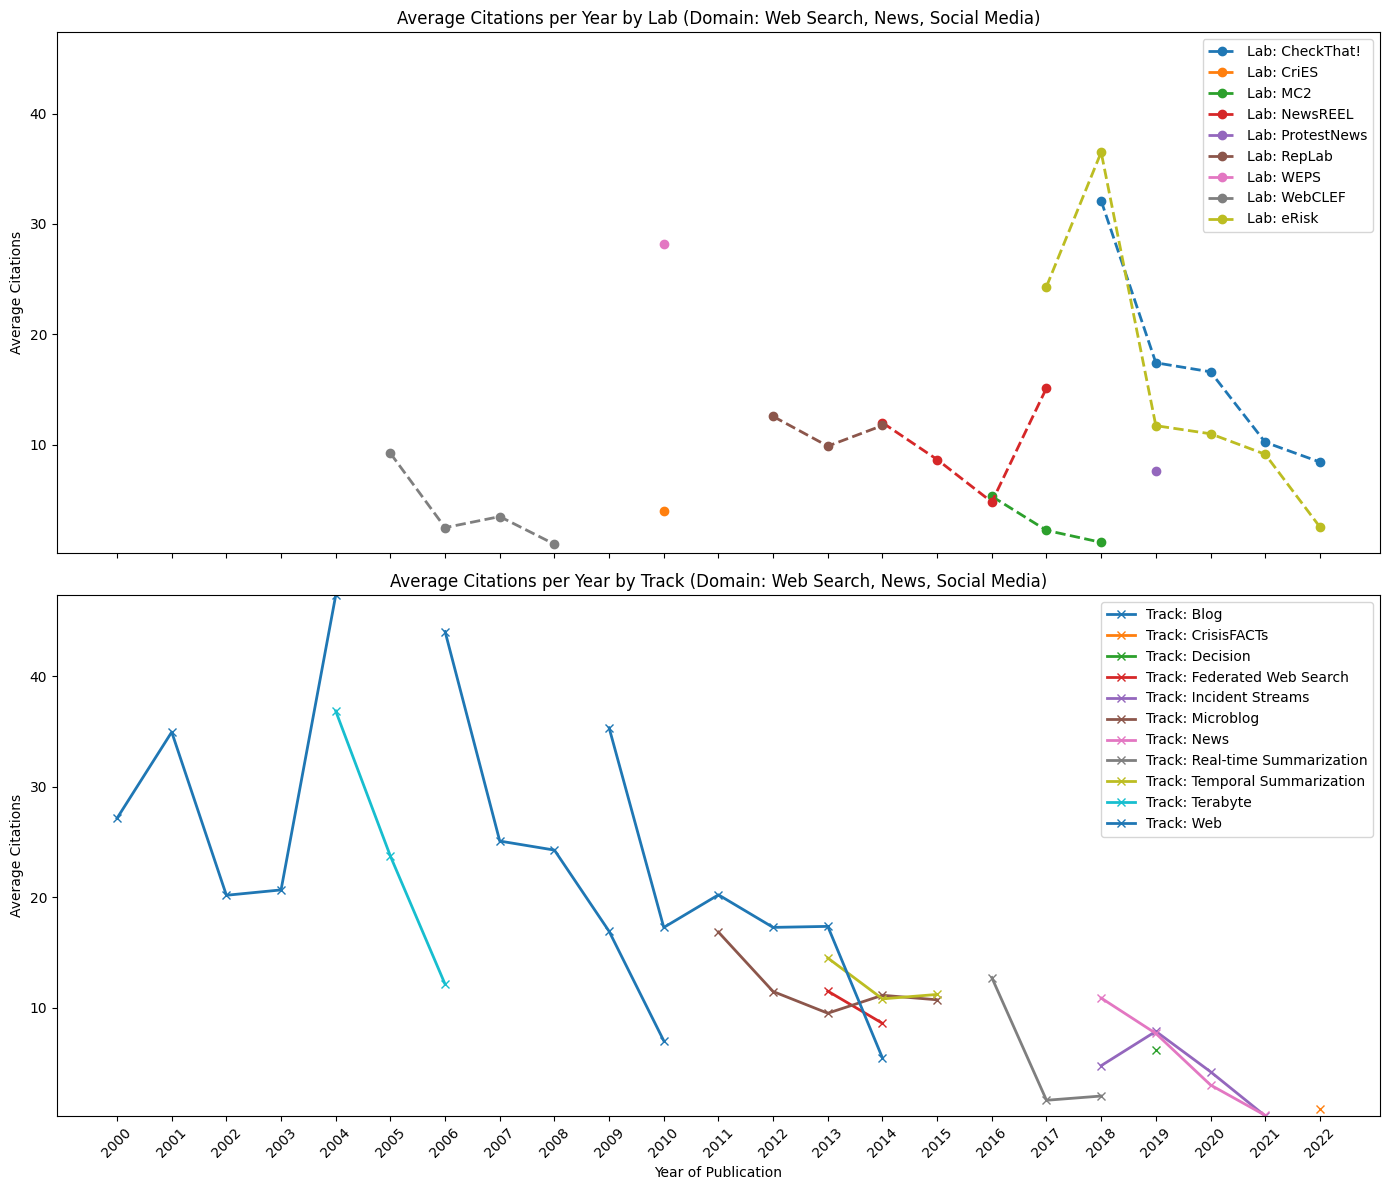

In [27]:
filter_and_plot_avg_citations(df_ceur, df_trec, labs_web, tracks_web, threshold=5, path_to_save="../../../images/Web_domain.png", title = "", title_fig_1="Average Citations per Year by Lab (Domain: Web Search, News, Social Media)", 
                             title_fig_2="Average Citations per Year by Track (Domain: Web Search, News, Social Media)")

## Analyse Semantic IR Labs

In [28]:
semantic_ir_labs = ["PAN", "Morpho", "SemEval", "SimpleText", "LeQua", "JokeR"]
semantic_ir_tracks = ["Conversational Assistance"]

C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['PubYear'] = df1_filtered['PubYear'].astype(int)
C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['PubYear'] = df2_filtered['PubYear'].astype(int)


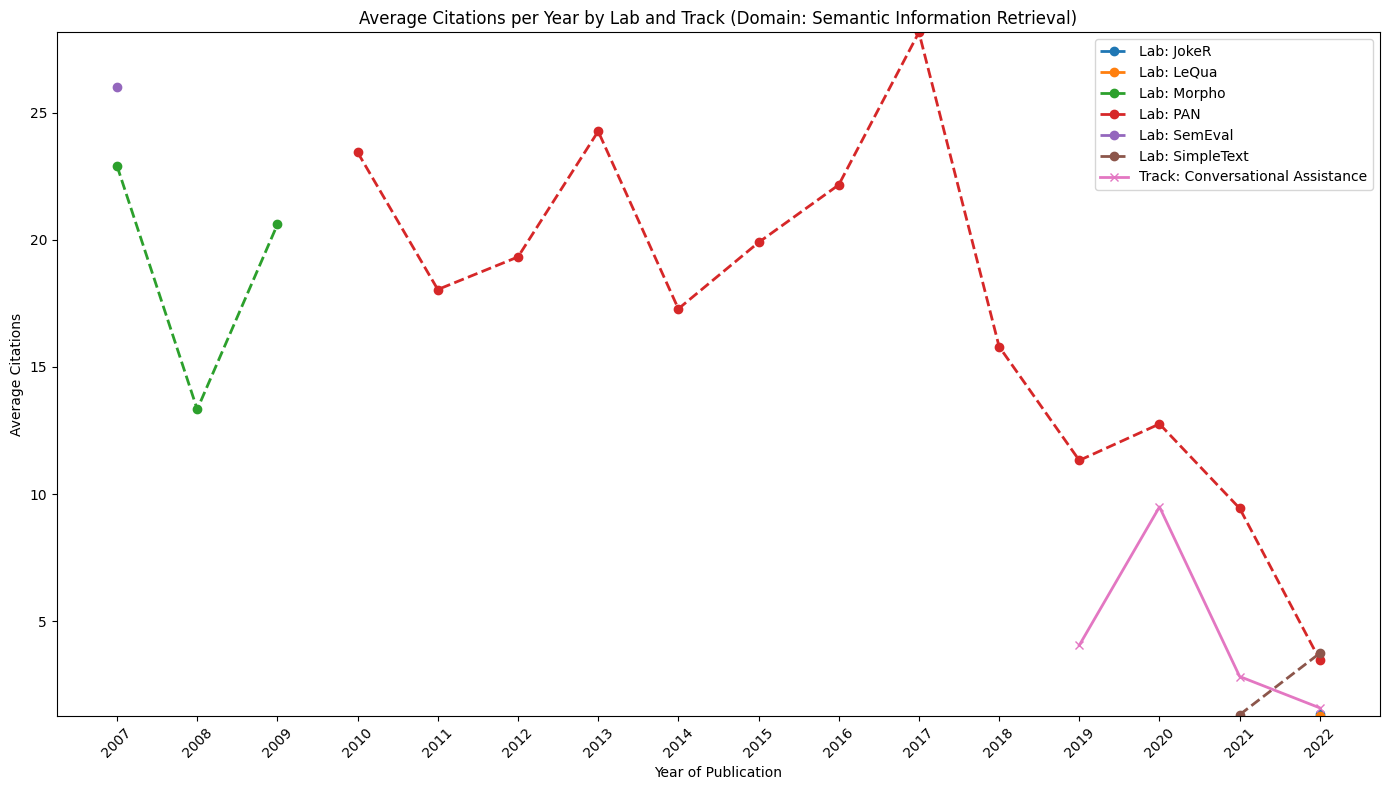

In [29]:
filter_and_plot_avg_citations(df_ceur, df_trec, semantic_ir_labs, semantic_ir_tracks, threshold=10, path_to_save="../../../images/semantic.png", title = "Average Citations per Year by Lab and Track (Domain: Semantic Information Retrieval)", title_fig_1="", 
                             title_fig_2="")

In [30]:
df_ceur_2010_2016 = df_ceur[(df_ceur["PubYear"] >= 2010) & (df_ceur["PubYear"] <= 2016)]
df_trec_2010_2016 = df_trec[(df_trec["PubYear"] >= 2010) & (df_trec["PubYear"] <= 2016)]

In [31]:
labs_already_used = list(set(labs + labs_web + semantic_ir_labs))
tracks_already_used = list(set(tracks + tracks_web + semantic_ir_tracks))

In [32]:
labs_2010_2016 = list(set([lab for sublist in df_ceur_2010_2016['Labs'] for lab in sublist]))

In [33]:
tracks_2010_2016 = list(set([track for sublist in df_trec_2010_2016['Tracks'] for track in sublist]))

In [34]:
labs_2010_2016 = [lab for lab in labs_2010_2016 if lab not in labs_already_used]
tracks_2010_2016 = [track for track in tracks_2010_2016 if track not in tracks_already_used]

C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['PubYear'] = df1_filtered['PubYear'].astype(int)
C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['PubYear'] = df2_filtered['PubYear'].astype(int)


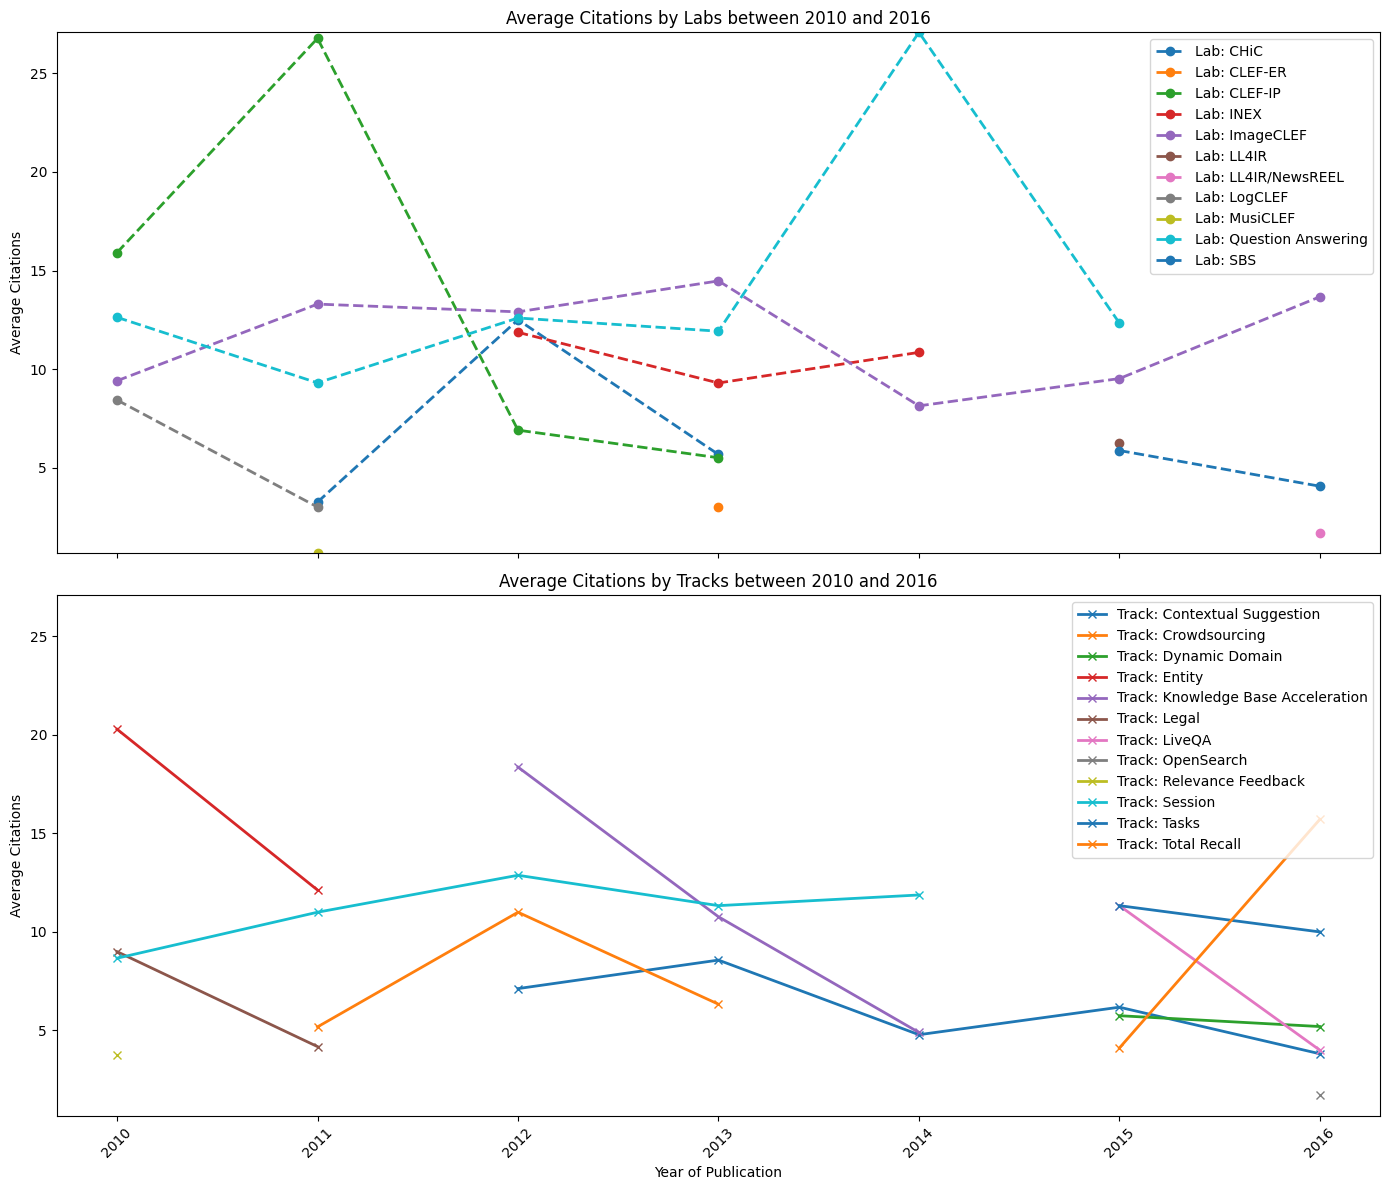

In [35]:
filter_and_plot_avg_citations(df_ceur_2010_2016, df_trec_2010_2016, labs_2010_2016, tracks_2010_2016, threshold=5, path_to_save="../../../images/tracks_labs_2010_to_2016.png", title = "", title_fig_1="Average Citations by Labs between 2010 and 2016", 
                             title_fig_2="Average Citations by Tracks between 2010 and 2016")

In [36]:
df_ceur_2016_2022 = df_ceur[(df_ceur["PubYear"] >= 2016) & (df_ceur["PubYear"] <= 2022)]
df_trec_2016_2022 = df_trec[(df_trec["PubYear"] >= 2016) & (df_trec["PubYear"] <= 2022)]

In [37]:
labs_2016_2022 = list(set([lab for sublist in df_ceur_2016_2022['Labs'] for lab in sublist]))
tracks_2016_2022 = list(set([track for sublist in df_trec_2016_2022['Tracks'] for track in sublist]))

labs_2016_2022 = [lab for lab in labs_2016_2022 if lab not in labs_already_used]
tracks_2016_2022 = [track for track in tracks_2016_2022 if track not in tracks_already_used]

C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['PubYear'] = df1_filtered['PubYear'].astype(int)
C:\Users\Andreas\AppData\Local\Temp\ipykernel_19044\2904380143.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['PubYear'] = df2_filtered['PubYear'].astype(int)


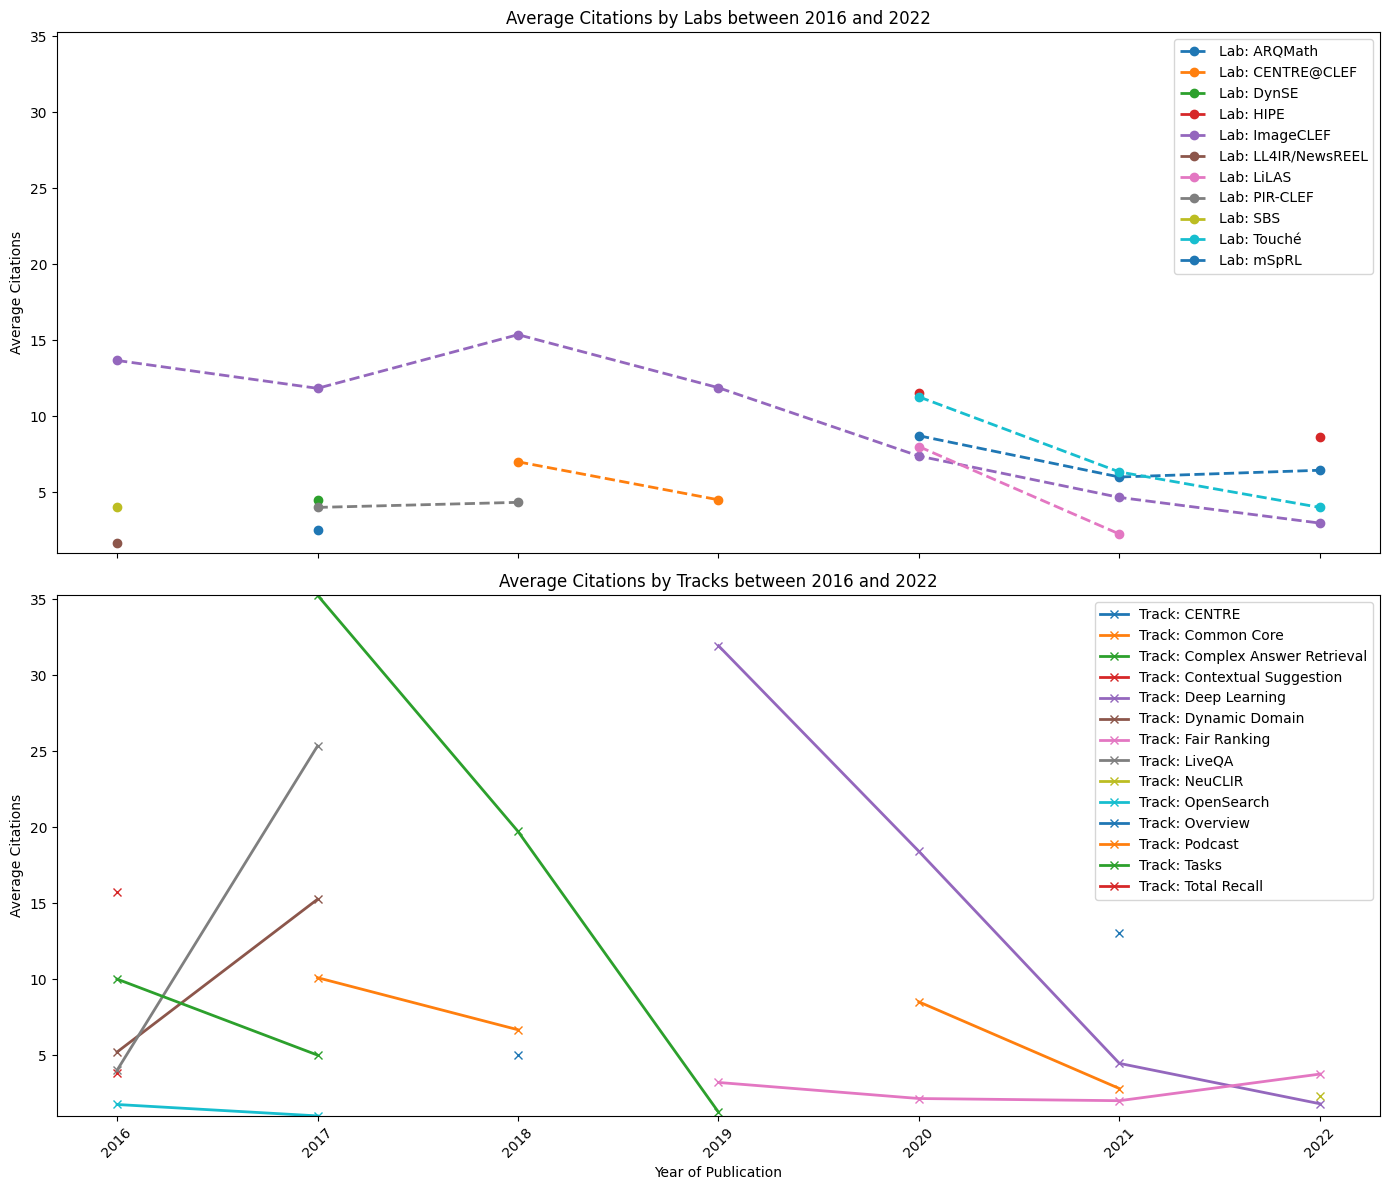

In [38]:
filter_and_plot_avg_citations(df_ceur_2016_2022, df_trec_2016_2022, labs_2016_2022, tracks_2016_2022, threshold=5, path_to_save="../../../images/tracks_labs_2016_to_2022.png", title = "", title_fig_1="Average Citations by Labs between 2016 and 2022", 
                             title_fig_2="Average Citations by Tracks between 2016 and 2022")